In [6]:
def get_value(logfile):
    
    loss = []
    kl = []
    
    with open(logfile, 'r') as file:
        for line in file:
                parts = line.split()
                for part in parts:
                    if 'loss:' in part:
                        s1 = part.split(':')[1]
                        s1 = s1.replace(",","")
                        f1 = float(s1)
                        loss.append(f1)
                    if 'kl:' in part:
                        s2 = part.split(':')[1]
                        s2 = s2.replace(",","")
                        f2 = float(s2)
                        kl.append(f2)

    return loss, kl

In [7]:
log_file1 = 'train1.log'
log_file2 = 'train2.log'
log_file3 = 'train3.log'

loss1, kl1 = get_value(log_file1)
loss2, kl2 = get_value(log_file2)
loss3, kl3 = get_value(log_file3)

loss = loss1 + loss2 + loss3
kl = kl1 + kl2 + kl3

print(loss)

[2.894719123840332, 2.2301993370056152, 2.0230846405029297, 1.9181852340698242, 1.9427239894866943, 2.1101953983306885, 2.06280255317688, 2.003316640853882, 1.8742620944976807, 1.8190176486968994, 1.9438449144363403, 2.015026092529297, 1.9081982374191284, 1.9181084632873535, 1.9039437770843506, 2.0589935779571533, 2.1413702964782715, 2.0587334632873535, 2.0901665687561035, 2.0864646434783936, 2.124577283859253, 2.0845367908477783, 2.032014846801758, 2.0532209873199463, 2.134666919708252, 2.206270694732666, 2.0866785049438477, 2.0669212341308594, 1.9493606090545654, 2.0933427810668945, 2.0578455924987793, 2.0496089458465576, 2.0323286056518555, 2.099482297897339, 2.130950927734375, 2.0797064304351807, 2.0234646797180176, 2.1169273853302, 2.061713218688965, 2.0501716136932373, 2.021780252456665, 1.9731065034866333, 1.9805889129638672, 2.0177688598632812, 2.0443058013916016, 1.9746906757354736, 2.1049327850341797, 3.695195198059082, 2.509999990463257, 2.4216203689575195, 2.369419097900390

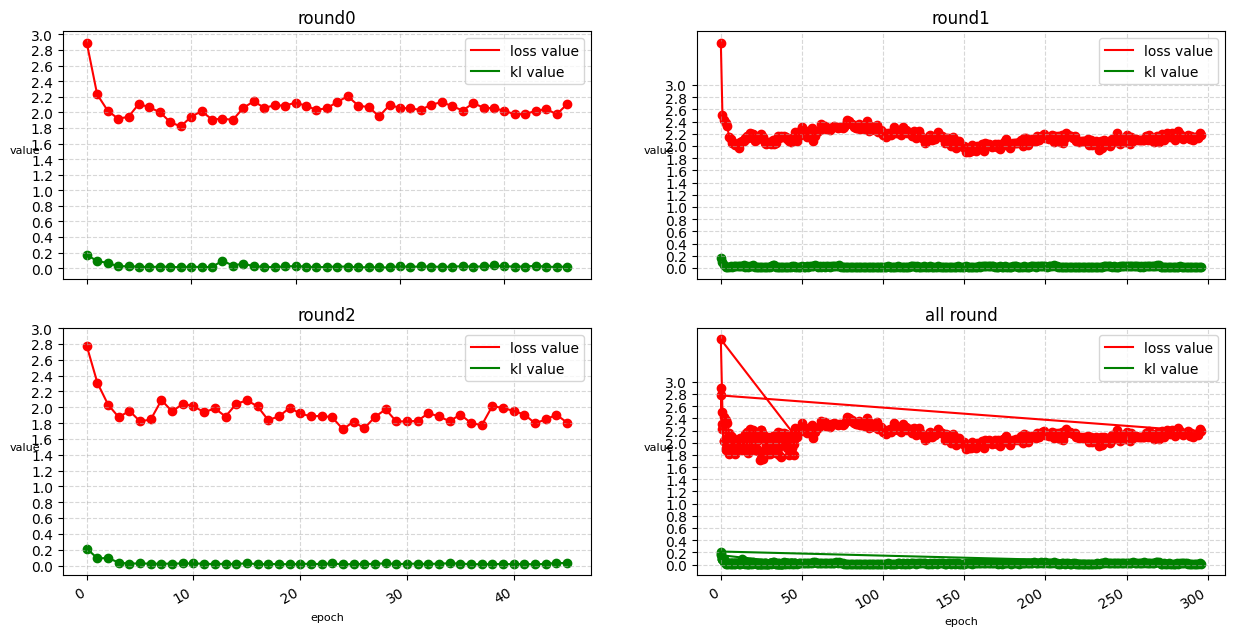

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), dpi=100)
axs = axs.flatten()

loss_values = [loss1, loss2, loss3, loss]
kl_values = [kl1, kl2, kl3, kl]
epoch1 = list(range(len(loss1)))
epoch2 = list(range(len(loss2)))
epoch3 = list(range(len(loss3)))
epoch = epoch1 + epoch2 + epoch3
epoch_values = [epoch1, epoch2, epoch3, epoch]


for i in range(4):
    axs[i].plot(epoch_values[i], loss_values[i], c='red', label='loss value')
    axs[i].plot(epoch_values[i], kl_values[i], c='green', label='kl value')
    axs[i].scatter(epoch_values[i], loss_values[i], c='red')
    axs[i].scatter(epoch_values[i], kl_values[i], c='green')
    axs[i].legend(loc='best')
    axs[i].set_yticks(np.arange(0, 3.2, 0.2))
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].set_xlabel("epoch", fontdict={'size': 8})
    axs[i].set_ylabel('value', fontdict={'size': 8}, rotation=0)
    if i < 3:
        title = "round{}".format(i)
    else:
        title = str('all round')
    axs[i].set_title(title, fontdict={'size': 12})

fig.autofmt_xdate()
plt.show()